# <span style="color:red"> Lezione 10 </span>

### C++ Code

* 10.1\
Il codice si basa sulla programmazione ad oggetti:
    * `funzioni.h` che contiene le funzioni per settare il random gen, la configurazione delle città e stampare a terminale i parametri della simulazione.
    * la classe `Individual.h` che contiene al suo interno:
        * il vettore `Genis` dei geni dove è salvato il percorso;
        * funzioni per settare e accedere ai geni;
        * `Calc_Fitness2` che calcola la L2 del percorso;
        * `Evolve` che va a modificare il vettore `Genis` in base alle singole mutazioni;
        * le mutazioni (tutte hanno una probabilità del 25%)
            * `Mutazion1` inverte due elementi di `Genis`;
            * `Mutation3` permuta degli elementi di `Genis` all'interno del blocco che va da _i_ a _i+n_block_ (i -> i+n_block, (i+1) -> (i+n_block-1), ...);
            * `Mutation4` inversione degli elementi di `Genis` che vanno da _i_ a _i+n_block_;
            * `Mutation2` shift di una posizione in avanti degli elementi di `Genis` che vanno da _i_ a _i+n_block_
          (Tutti gli indici e le grandezze dei blocchi sono estratte random _con_  _cautela_ )

    I parametri utilizzati per il SA sono:
        * Circ (S_Temp=10, d_Temp=0.0001, absTemp=0.0001);
        * Square (S_Temp=1, d_Temp=0.00001, absTemp=0.00001);\
    Per metropolis il termine che va a confrontarsi con il numero estratto random r è $e^{(-\Delta F)/T}$ con $\Delta F = F_{new}-F_{actual}$, assumendo $k_b=1$
    
    Tutti gli output di C++ sono contenuti nella directory `data`:
        - `Cities_config_circ/square.0` file che contiene le disposizioni delle città:
        
1° colonna|2° colonna|3° colonna|
----------|----------|----------|
num city|x_city|y_city|


        - `best_path_circ/square.dat` file che contiene il migliore percorso (cioè `Genis` alla temperatura assoluta (stessa composizione del file precedente)
        - `L2_circ/square.dat` file che contiene l'andamento della metrica ("fitness") in funzione della temperatura (e quindi delle evoluzioni):

1° colonna|2° colonna|
----------|----------|
numero gen|L^2 media su mezza pop|

* 10.2\
Il codice è lo stesso 9.1, a cui però è stato aggiunto il calcolo parallelo.\
Il programma è stato strutturato per 4 continenti che si scambiano il miglior individuo ogni 50 generazioni. Lo scambio tra i continenti avviene tra 0<-->1 e 2<-->3. Dopo che sono avvenute metà delle generazioni gli scambi diventano 0<-->3 e 1<-->2.\
Per la configurazione delle città viene usato un generatore rnd settato per ogni rank allo stesso modo, così che tutti i continenti lavorino su una stessa configurazione. (è la stessa pure di 9.1).

### Comandi esecuzione

* 10.1\
    `./main.exe a` dove `a` è:
    * 0 ---> circ
    * 1 ---> square
    
* 10.2\
    `mpirun -oversubscribe -np N ./main.exe a` 
    - dove N è il numero di continenti (pari)=4
    - dove `a` è:
        * 0 ---> circ
        * 1 ---> square


## <span style="color:green"> Esercizio 10.1 </span>

### Python Code

Defisco le funzioni per la lettura e il plot dei grafici.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# config
def read_config(forma):
    N, X, Y = np.loadtxt("10.1/data/Cities_config_"+forma+".0", usecols=(0,1,2), delimiter=' ', unpack='true')
    return N, X, Y
def plot_config(Forma):
    N, X, Y = read_config(Forma)
    fig = plt.figure(figsize=(5,5))
    plt.scatter(X, Y, marker='+')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Cities config: '+Forma)
    plt.show()
# best path
def read_best(forma):
    N, X, Y = np.loadtxt("10.1/data/best_path_"+forma+".dat", usecols=(0,1,2), delimiter=' ', unpack='true')
    return N, X, Y
def plot_best(forma):
    fig = plt.figure(figsize=(5,5))
    N, X, Y = read_config(forma)
    B_city, B_X, B_Y = read_best(forma)
    plt.scatter(X, Y, marker='+', color='green', label='Cities')
    plt.plot(B_X, B_Y,alpha=0.3, label='Best path')
    plt.scatter(B_X[0],B_Y[0],marker='*', color='red', label='First city')
    plt.scatter(B_X[len(X)-1],B_Y[len(X)-1],marker='*', color='black', label='Last city')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Cities config with best path: '+forma)
    plt.legend(loc=(1,0.767))
    plt.show()
# metric
def read_metric(forma):
    Temp, N_gene, L2 = np.loadtxt("10.1/data/L2_"+forma+".dat", usecols=(0,1,2), delimiter=' ', unpack='true')
    return Temp, N_gene, L2
def plot_L2(forma):
    fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(12,5),gridspec_kw=dict(wspace=0.5, hspace=0.5))
    Temp, N_ev, L2 = read_metric(forma)
    ax[0].plot(N_ev, L2)
    ax[0].set_xlabel('# evolution')
    ax[0].set_ylabel('L^2')
    ax[0].set_title(f'L^2 with {(int)(N_ev[-1])} evolution')
    ax[0].grid(True)
    ax[1].plot(Temp, L2, color='orange')
    ax[1].set_xlabel('Temp')
    ax[1].set_ylabel('L^2')
    ax[1].set_title(r'L^2 with $Temp_{start}$='+f'{Temp[0]}'+r' and $Temp_{final}$='+f'{Temp[-1]}')
    ax[1].grid(True)
    plt.show()

* Circ distribution

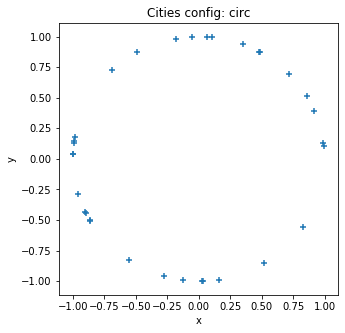

In [16]:
plot_config("circ")

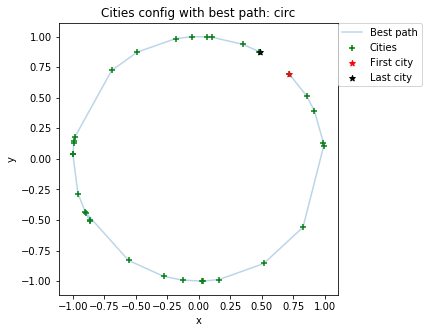

In [17]:
plot_best("circ")

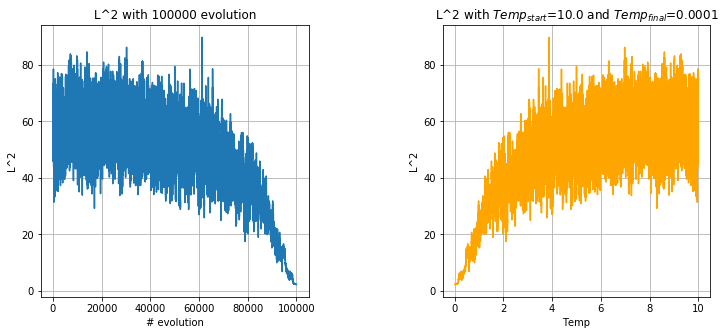

In [18]:
plot_L2("circ")

In [19]:
N,  T, L2 = read_metric('circ')
L2_circ = L2[-1]

* Square distribution

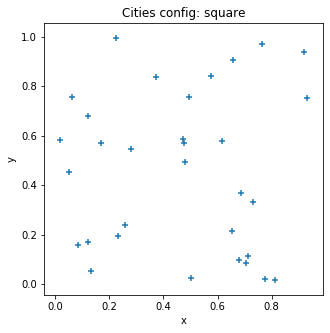

In [20]:
plot_config("square")

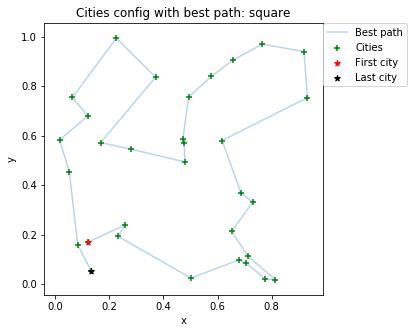

In [21]:
plot_best("square")

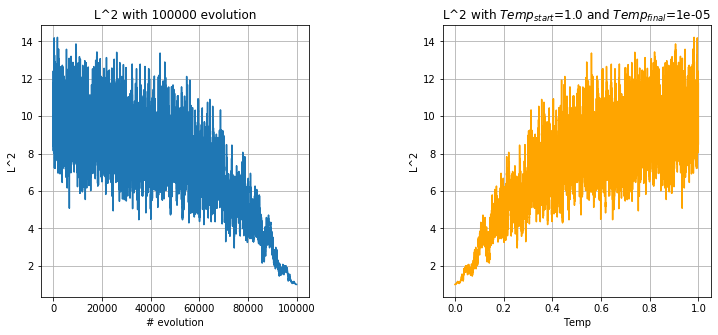

In [22]:
plot_L2("square")

In [23]:
N,  T, L2 = read_metric('square')
L2_square = L2[-1]

#### <span style="color:blue">Metrics comparison</span>

In [2]:
def read_metric_9_1(forma):
    N_gene, L2 = np.loadtxt("../lezione9/9.1/data/Ave_half_"+forma+".0", usecols=(0,1), delimiter=' ', unpack='true')
    return N_gene, L2

In [25]:
N, L2_GA_circ = read_metric_9_1('circ')
N, L2_GA_square = read_metric_9_1('square')
print(f'Circ: GA={L2_GA_circ[-1]}, SA={L2_circ};')
print(f'Square: GA={L2_GA_square[-1]}, SA={L2_square};')

Circ: GA=2.24536, SA=2.287;
Square: GA=1.30781, SA=1.00377;


La differenza in `circ` è dovuta alla disposizione delle città (entrami GA, SA hanno trovato il percorso migliore), mentre in `square` SA ha trovato un percoso migliore.

## <span style="color:green"> Esercizio 10.2 </span>

### Python code

Definisco le funzioni di lettura e plot.

In [21]:
def read_config2(forma):
    N, X, Y = np.loadtxt("10.2/data/Cities_config_"+forma+".0", usecols=(0,1,2), delimiter=' ', unpack='true')
    return N, X, Y
def plot_config2(Forma):
    N, X, Y = read_config(Forma)
    fig = plt.figure(figsize=(5,5))
    plt.scatter(X, Y, marker='+')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Cities config: '+Forma)
    plt.show()
# path
def read_bpath(forma,r):
    N, X, Y = np.loadtxt("10.2/data/Best_indiv_rank"+r+"_"+forma+".0", usecols=(0,1,2), delimiter=' ', unpack='true')
    return N, X, Y
def plot_bpaths(forma,i):
    fig, ax = plt.subplots(nrows=1, ncols=i,figsize=(25,5),gridspec_kw=dict(wspace=0.3, hspace=0.5))
    for j in range(i):
        N, X, Y = read_config2(forma)
        B_city, B_X, B_Y = read_bpath(forma,str(j))
        ax[j].scatter(X, Y, marker='+', color='green', label='Cities')
        ax[j].plot(B_X, B_Y,alpha=0.3, label='Best path')
        ax[j].scatter(B_X[0],B_Y[0],marker='*', color='red', label='First city')
        ax[j].scatter(B_X[len(X)-1],B_Y[len(X)-1],marker='*', color='black', label='Last city')
        ax[j].set_xlabel('x')
        ax[j].set_ylabel('y')
        ax[j].set_title(f'Cities config with best path: '+forma+'; rank'+str(j))
        ax[j].legend(loc=(1,0.767))
    plt.show()
# metric
def read_metric2(forma,r):
    N_gene, L2 = np.loadtxt("10.2/data/Ave_half_rank"+r+"_"+forma+".0", usecols=(0,1), delimiter=' ', unpack='true')
    return N_gene, L2
def plot_L2(forma,i):
    fig, ax = plt.subplots(nrows=1, ncols=i,figsize=(25,5),gridspec_kw=dict(wspace=0.3, hspace=0.5))
    for j in range(i):
        N_g9_1, L2_9_1 = read_metric_9_1(forma)
        N_gene, L2 = read_metric2(forma,str(j))
        ax[j].plot(N_gene, L2, label='<L^2>(gen); rank'+str(j))
        ax[j].plot(N_g9_1, L2_9_1, label='<L^2>(gen), 9.1')
        ax[j].set_xlabel('# gen')
        ax[j].set_ylabel('<L^2>')
        ax[j].set_title('<L^2> on best half of the population: '+forma+'; rank'+str(j))
        ax[j].legend()
    plt.show()

* Circ distribution

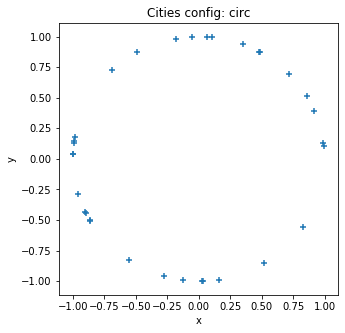

In [22]:
plot_config2("circ")

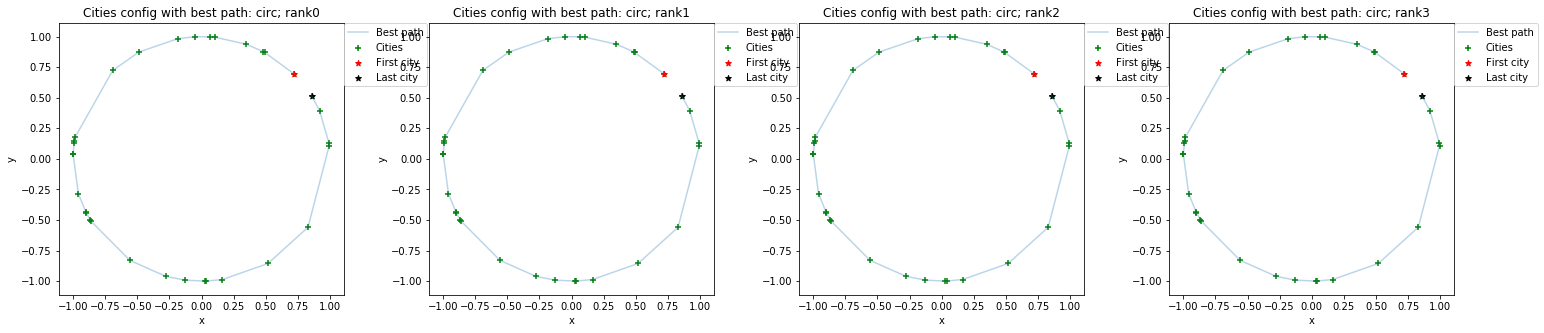

In [23]:
plot_bpaths("circ",4)

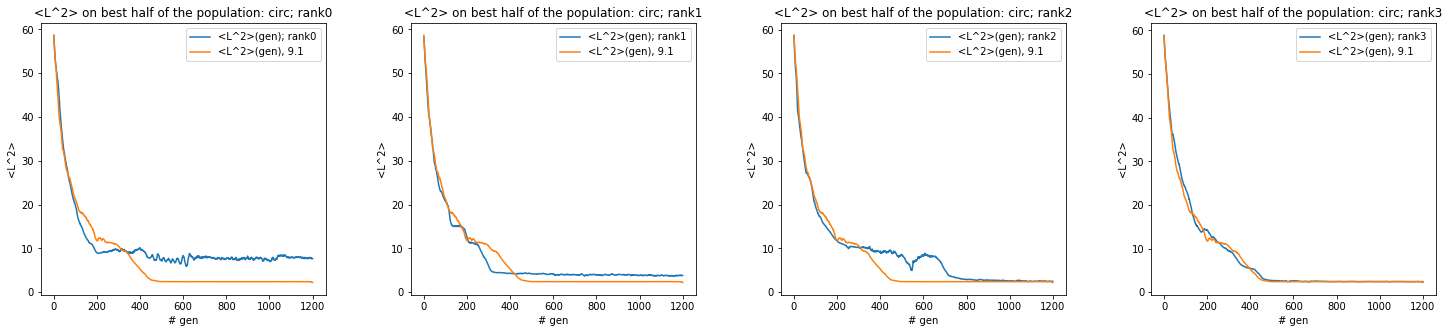

In [24]:
plot_L2("circ",4)

* Square distribution

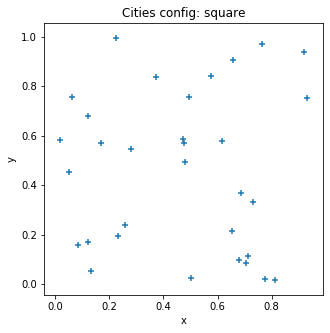

In [25]:
plot_config2("square")

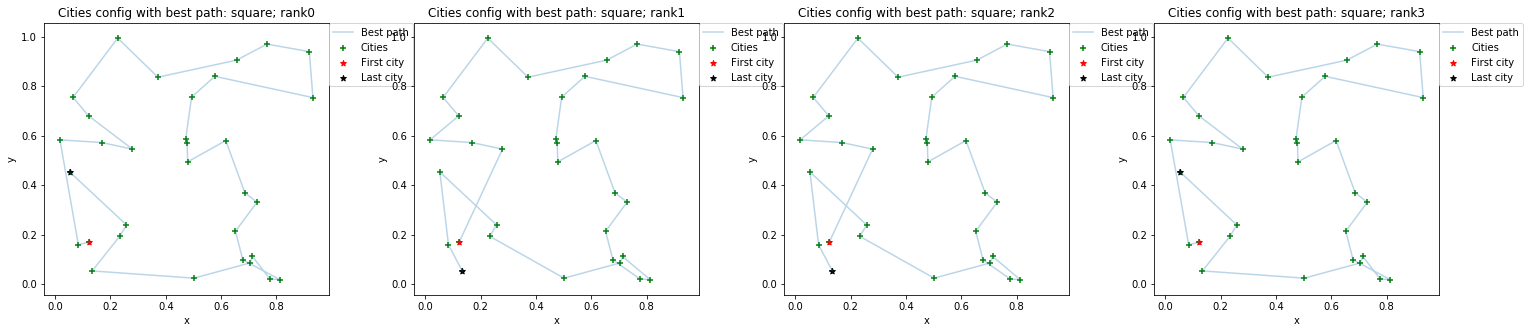

In [26]:
plot_bpaths("square",4)

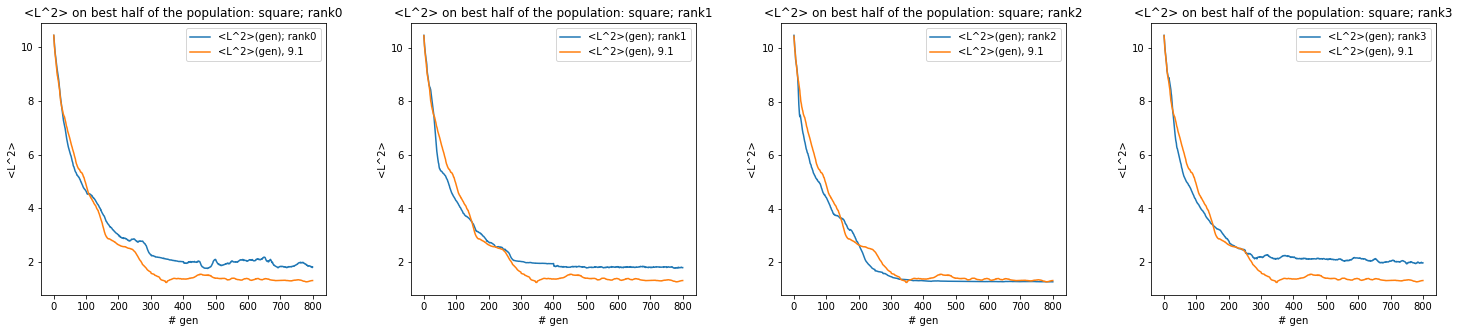

In [27]:
plot_L2("square",4)

#### <span style="color:blue">Metrics comparison</span>

In [29]:
N, L2_0 = read_metric2('circ','0')
L2_0_circ = L2_0[-1]
N, L2_1 = read_metric2('circ','1')
L2_1_circ = L2_1[-1]
N, L2_2 = read_metric2('circ','2')
L2_2_circ = L2_2[-1]
N, L2_3 = read_metric2('circ','3')
L2_3_circ = L2_3[-1]
#######################
N, L2_0 = read_metric2('square','0')
L2_0_square = L2_0[-1]
N, L2_1 = read_metric2('square','1')
L2_1_square = L2_1[-1]
N, L2_2 = read_metric2('square','2')
L2_2_square = L2_2[-1]
N, L2_3 = read_metric2('square','3')
L2_3_square = L2_3[-1]
N, L2_GA_circ = read_metric_9_1('circ')
N, L2_GA_square = read_metric_9_1('square')
print(f'Circ: GA(rank 0)={L2_0_circ}, GA(rank 1)={L2_1_circ}, GA(rank 2)={L2_2_circ}, GA(rank 3)={L2_3_circ},GA={L2_GA_circ[-1]};')
print(f'Square: GA(rank 0)={L2_0_square}, GA(rank 1)={L2_1_square}, GA(rank 2)={L2_2_square}, GA(rank 3)={L2_3_square},GA={L2_GA_square[-1]};')

Circ: GA(rank 0)=7.67966, GA(rank 1)=3.82646, GA(rank 2)=2.48445, GA(rank 3)=2.41891,GA=2.24536;
Square: GA(rank 0)=1.8089, GA(rank 1)=1.78857, GA(rank 2)=1.26006, GA(rank 3)=1.96726,GA=1.30781;
